# KMC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
from  sklearn.datasets import make_blobs


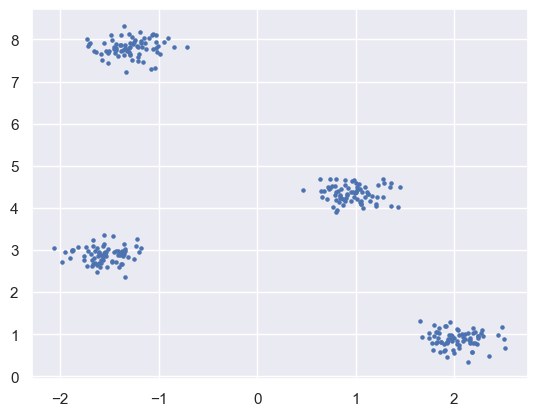

In [3]:
X,y=make_blobs(n_samples=300,centers=4,cluster_std=.20,random_state=0)
plt.scatter(X[:,0],X[:,1],s=5)

In [4]:
print('printing top 10 x -is input value')
print(X[:10])


printing top 10 x -is input value
[[ 1.64913063  1.31056223]
 [-1.30338988  7.69351442]
 [ 1.03591771  4.56906451]
 [-1.17170929  7.82861156]
 [ 1.79396215  1.2292898 ]
 [ 2.51605086  0.6856605 ]
 [-1.62067685  2.477594  ]
 [ 1.12208819  4.32958391]
 [-0.90048124  8.03433889]
 [-1.06920372  8.11045283]]


In [5]:
y[:10]


array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3])

In [6]:
from sklearn.cluster import KMeans

kmn=KMeans(n_clusters=4)# k value

kmn.fit(X) # here kmn is considered as model,here x alone given bcoz its unsupervised

y_Kmn=kmn.predict(X) # y_kmn is similar to ypre

print('predicted output = ',y_Kmn[:20]) # printing only top20 predicted output

print('actual output =',y[:20]) # printing only top 20 original output

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


predicted output =  [2 1 3 1 2 2 0 3 1 1 0 1 3 1 2 3 3 2 0 0]
actual output = [1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2]


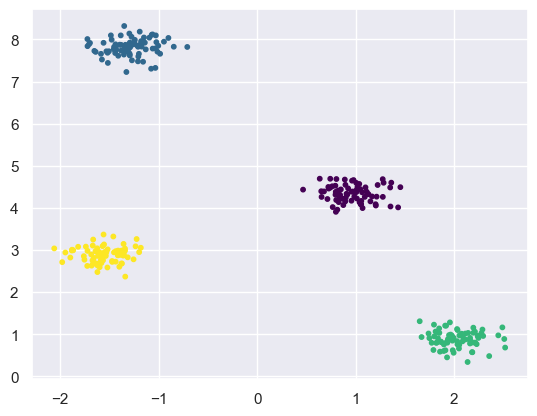

In [7]:
from sklearn.metrics import pairwise_distances_argmin

def finding_cluster(X,n_clusters,rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters] # permutation - arrangment
    centers=X[i]
    while 1:
        labels=pairwise_distances_argmin(X,centers)
        new_centers=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers=new_centers # centroid updation happens here
    return centers,labels

# function call

centers,labels=finding_cluster(X,4)

plt.scatter(X[:,0],X[:,1],s=10,c=labels,cmap='viridis')

In [8]:
#for i in range(10):
#    print(i,end='')

[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

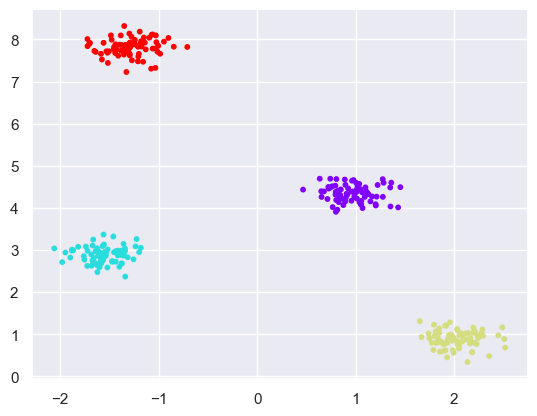

In [9]:
centers,labels=finding_cluster(X,4,rseed=6)
plt.scatter(X[:,0],X[:,1],s=10,c=labels,cmap='rainbow')

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


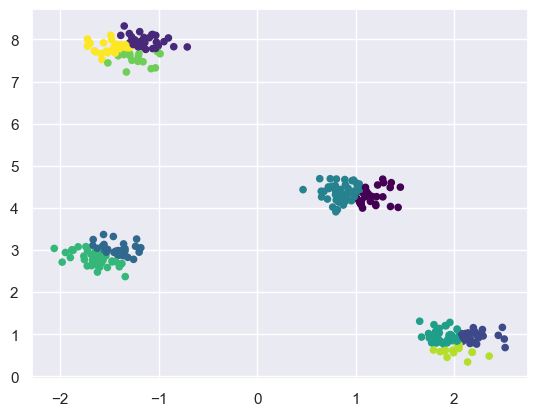

In [10]:
labels=KMeans(10,random_state=2).fit_predict(X)
plt.scatter(X[:,0],X[:,1],s=20,c=labels,cmap='viridis')

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


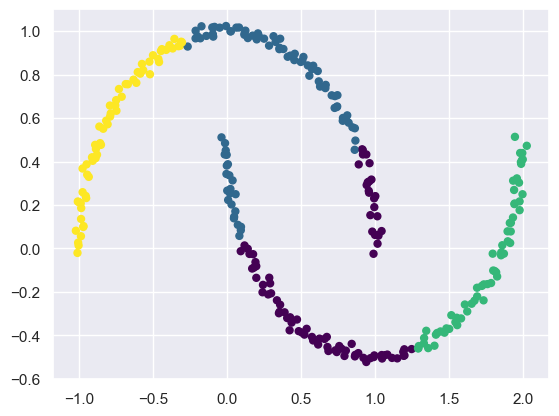

In [11]:
from sklearn.datasets import make_moons
X,y=make_moons(300,noise=0.02,random_state=2)
labels=KMeans(4,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],s=25,c=labels,cmap='viridis')

In [12]:
#kmeans on digits
from sklearn.datasets import load_digits
digit=load_digits()
digit.data.shape

(1797, 64)

In [13]:
kmeans=KMeans(n_clusters=10,random_state=2)
clusters=kmeans.fit_predict(digit.data) # here digit.data is X
kmeans.cluster_centers_.shape

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

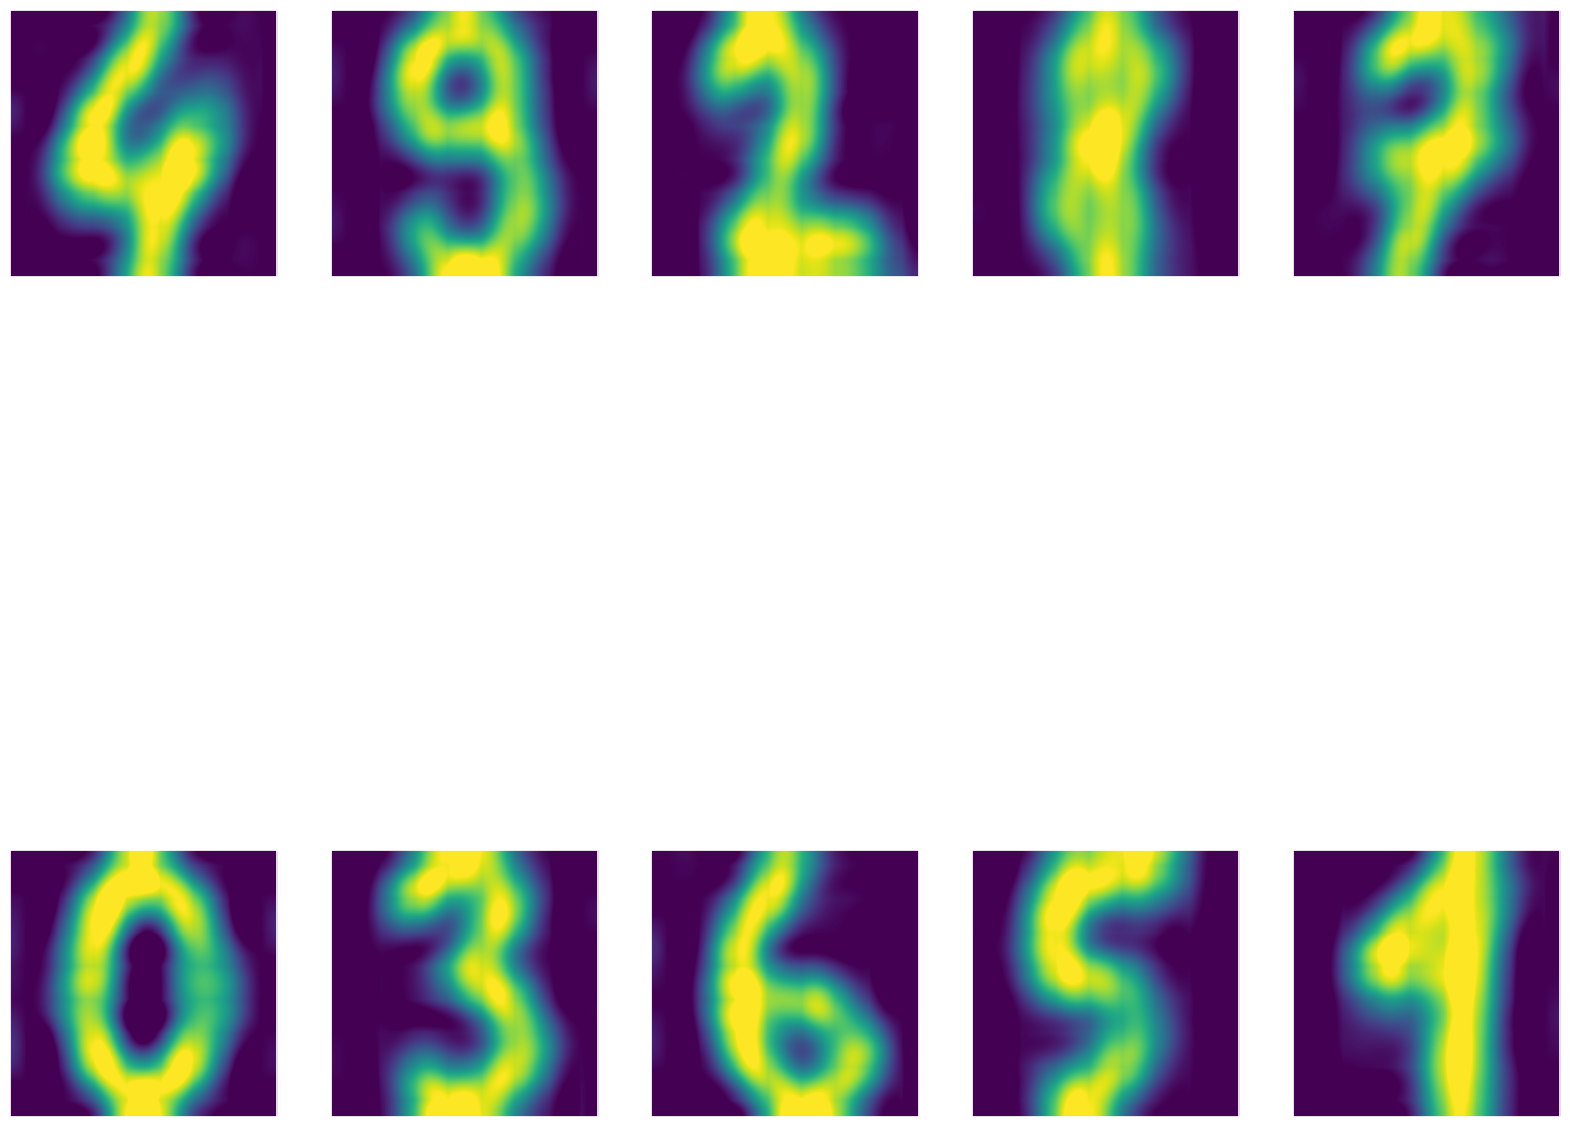

In [14]:
#plotting digits
fig,ax=plt.subplots(2,5,figsize=(20,20))
centers=kmeans.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat,centers):
    axi.set(xticks=[],yticks=[])
    axi.imshow(center,interpolation='sinc',cmap='viridis')

In [15]:
from scipy.stats import mode
labels=np.zeros_like(clusters)
for i in range(10):
    mask=(i==clusters)
    labels[mask]=mode(digit.target[mask])[0]

C:\Users\user\AppData\Local\Temp\ipykernel_9336\20635898.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask]=mode(digit.target[mask])[0]


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(digit.target,labels)

0.7952142459654981

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
mtrx=confusion_matrix(digit.target,labels)
print(mtrx)


[[177   0   0   0   1   0   0   0   0   0]
 [  0 154  24   1   0   1   2   0   0   0]
 [  1  10 148  13   0   0   0   3   0   2]
 [  0   7   0 154   0   2   0   7   0  13]
 [  0   7   0   0 166   0   0   8   0   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   3   0   0   0   0 177   0   0   0]
 [  0   2   0   0   0   0   0 177   0   0]
 [  0 105   3   2   0   4   2   5   0  53]
 [  0  21   0   6   0   6   0   7   0 140]]


In [18]:
creport = classification_report(digit.target,labels)
print(creport)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.50      0.85      0.63       182
           2       0.85      0.84      0.84       177
           3       0.88      0.84      0.86       183
           4       0.98      0.92      0.95       181
           5       0.91      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.86      0.99      0.92       179
           8       0.00      0.00      0.00       174
           9       0.56      0.78      0.65       180

    accuracy                           0.80      1797
   macro avg       0.75      0.79      0.76      1797
weighted avg       0.75      0.80      0.77      1797



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(74.45000000000006, 0.5, 'predicted value')

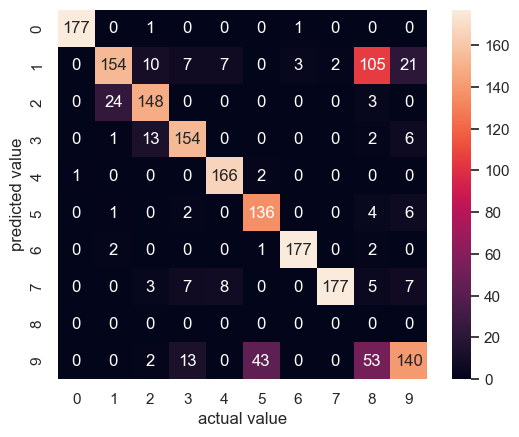

In [19]:
sns.heatmap(mtrx.T,square=True,cbar=True,annot=True,fmt='d',
            xticklabels=digit.target_names,yticklabels=digit.target_names)
plt.xlabel('actual value')
plt.ylabel('predicted value')

In [20]:
import PIL # deep learning - digital image processing - opencv - computer vision

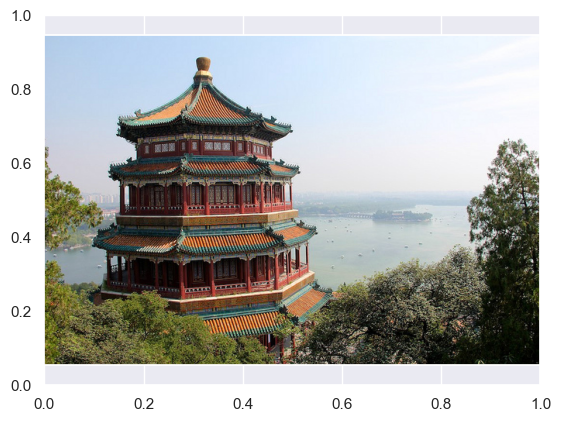

In [21]:
from sklearn.datasets import load_sample_image
name=load_sample_image('china.jpg')
fig,ax=plt.subplots()
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(name)

In [22]:
#Image dimesion
name.shape


(427, 640, 3)

In [23]:
data=name/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [24]:
#plotting pixels using functions(Display laksh of colours using 10000 samples)
def plotting_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=15)

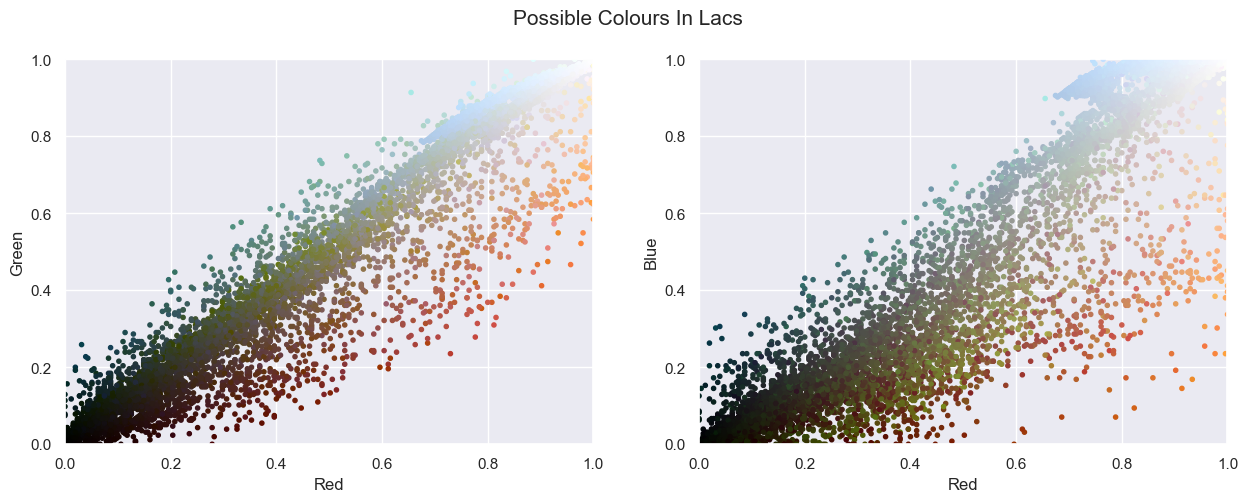

In [25]:
plotting_pixels(data,title='Possible Colours In Lacs')

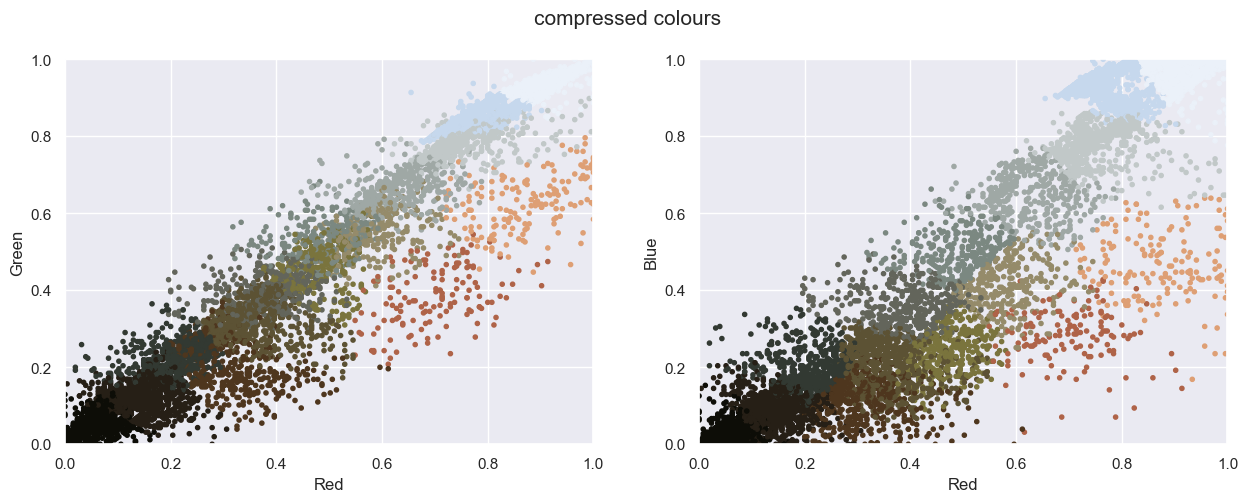

In [26]:
#Reduccing the issues of numpy using warnings
import warnings
warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmnz=MiniBatchKMeans(15)
kmnz.fit(data)
newcolors=kmnz.cluster_centers_[kmnz.predict(data)]
plotting_pixels(data,colors=newcolors,title='compressed colours')

Text(0.5, 1.0, 'Compressed Image')

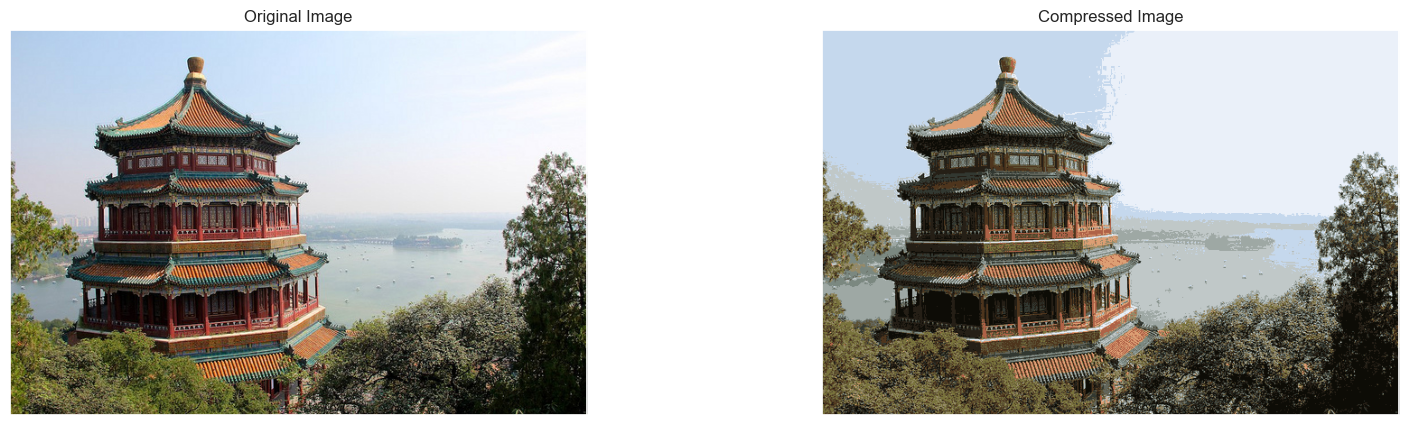

In [27]:
#compressing the color of china Image
name_compressed=newcolors.reshape(name.shape)
fig,ax=plt.subplots(1,2,figsize=(20,5),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.1)
ax[0].imshow(name)
ax[0].set_title('Original Image')
ax[1].imshow(name_compressed)
ax[1].set_title('Compressed Image')